## House Price Prediction through Machine Learning

### Phase 1: Data Collection and Preparation

In [1]:
# Importing libraries
import pandas as pd # for data manipulation
import numpy as np # for mathematical computations
import matplotlib.pyplot as plt # for robust visualization
import seaborn as sns # for more interesting visualization

In [2]:
# Link to get dataset
'''https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features?select=California_Houses.csv'''

'https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features?select=California_Houses.csv'

In [3]:
# Loading the housing dataset and display the first five rows
housing_df = pd.read_csv(r"C:\Users\USER\Desktop\AltSchool Africa\Capstone Project\California_Houses.csv")
housing_df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


#### Variable Description

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$]
2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]
3) Median Age: Median age of a house within a block; a lower number is a newer building [years]
4) Total Rooms: Total number of rooms within a block
5) Total Bedrooms: Total number of bedrooms within a block
6) Population: Total number of people residing within a block
7) Households: Total number of households, a group of people residing within a home unit, for a block
8) Latitude: A measure of how far north a house is; a higher value is farther north [°]
9) Longitude: A measure of how far west a house is; a higher value is farther west [°]
10) Distance to coast: Distance to the nearest coast point [m]
11) Distance to Los Angeles: Distance to the centre of Los Angeles [m]
12) Distance to San Diego: Distance to the centre of San Diego [m]
13) Distance to San Jose: Distance to the centre of San Jose [m]
14) Distance to San Francisco: Distance to the centre of San Francisco [m]

In [4]:
# Checking for null values
housing_df.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [5]:
housing_df.shape # Number of rows and columns in our data

(20640, 14)

In [6]:
housing_df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [7]:
# checking for duplicates in our dataset
housing_df.duplicated().sum()

0

In [8]:
# Dropping some columns relating to distance
housing_df.drop(columns= ['Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'], axis= 1,inplace= True)

The intuition behind dropping these features is because we think they will not add significant value to the predictive power of the model, especially because currently, we don't know what could be in those cities to make them important to our model and also it will make our model easier to interpret and faster to train. In the future when we have more detailed information about those features, we could consider them.

### Phase 2: Exploratory Data Analysis

In [9]:
# Descriptive statistics for the variables
housing_df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.817,115395.616,14999.000,119600.000,179700.000,264725.000,500001.000
Median_Income,20640.0,3.871,1.900,0.500,2.563,3.535,4.743,15.000
Median_Age,20640.0,28.639,12.586,1.000,18.000,29.000,37.000,52.000
Tot_Rooms,20640.0,2635.763,2181.615,2.000,1447.750,2127.000,3148.000,39320.000
Tot_Bedrooms,20640.0,537.898,421.248,1.000,295.000,435.000,647.000,6445.000
Population,20640.0,1425.477,1132.462,3.000,787.000,1166.000,1725.000,35682.000
Households,20640.0,499.540,382.330,1.000,280.000,409.000,605.000,6082.000
Latitude,20640.0,35.632,2.136,32.540,33.930,34.260,37.710,41.950
Longitude,20640.0,-119.570,2.004,-124.350,-121.800,-118.490,-118.010,-114.310
Distance_to_coast,20640.0,40509.265,49140.039,120.676,9079.757,20522.019,49830.414,333804.686


In [10]:
housing_df.columns # retrieving column names

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast'],
      dtype='object')

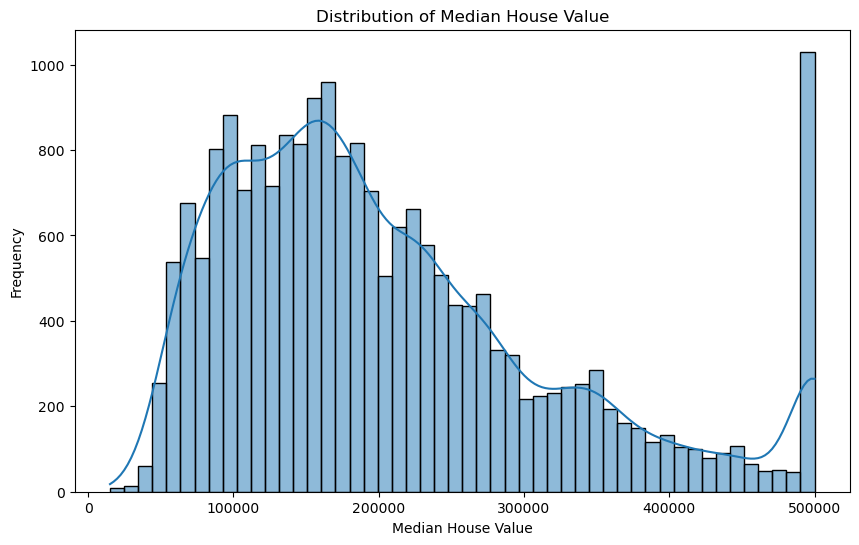

In [11]:
# Distribution of the target variable (Median House Value)
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['Median_House_Value'], kde=True, bins = 50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

The target variable (Median House value) is skewed to the right with an unusual peak of some houses priced at 500000. A right-skewed distribution in housing prices means that the majority of house prices are concentrated on the lower end of the scale, with fewer houses having very high prices. Factors Contributing to this could include income distribution, housing policies and development and urbanization. Income distribution, especially if the majority of the population has lower to middle income, most houses will be priced within their affordable range, leading to a concentration of lower-priced homes.
Government policies and programs aimed at providing affordable housing for low- and middle-income families can also result in a larger proportion of lower-priced homes. In addition, rapid urbanization may lead to a surge in the construction of affordable housing to meet the needs of a growing population.

Researching on why there might be an unusual peak at the maximum value, we found out that several factors could be the reason, some of the reasons being:
There might be a price ceiling or cap in the dataset, meaning that housing prices above a certain value are recorded as the maximum value.
The housing market might have distinct segments, and the segment at the high end might have a lot of houses priced around the maximum value.
The data might be rounded or truncated at certain thresholds for reporting purposes.

In [12]:
# Checking for the number of houses with the maximum value
capped_values = housing_df[housing_df['Median_House_Value'] == 500001].shape[0]
total_values = housing_df.shape[0]

print(f"Number of houses with value $500,000: {capped_values}")
print(f"Total number of houses: {total_values}")
print(f"Percentage of houses with value $500,000: {capped_values / total_values * 100:.2f}%")


Number of houses with value $500,000: 965
Total number of houses: 20640
Percentage of houses with value $500,000: 4.68%


We decided to check for the maximum house price and the number of houses that is priced at that value. we found out that the maximum house value is $500001 and 965 houses falls in the value and that accounts for about 5% of our dataset.

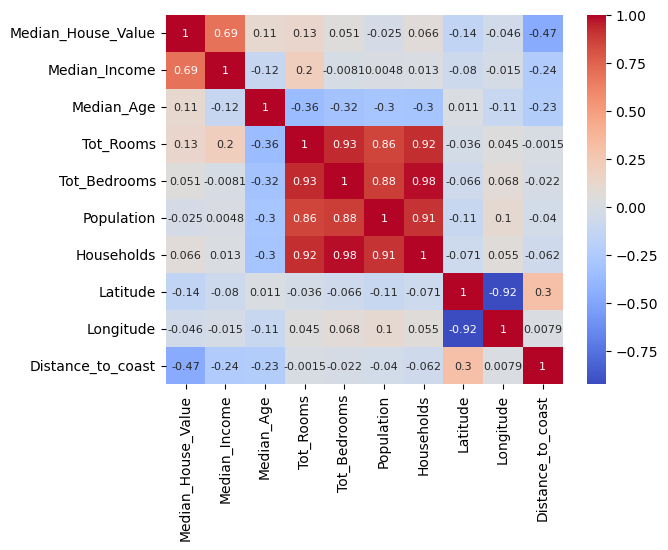

In [13]:
# Correlation matrix of the housing data 
sns.heatmap(housing_df.corr(), annot=True, annot_kws={"fontsize": 8}, cmap='coolwarm')
plt.show()

We decided to check the relatonship between the Median House Value and the remaining features to see how they vary with one another. 
The correlation matrix shows that there is a strong positive correlation of 0.69 between Median Income and Median House Value, indicating that higher incomes are associated with higher house values.
Also, there exist a very strong positive correlation of 0.93 between Tot_Rooms and Tot_Bedrooms, which implies that the number of rooms and bedrooms are highly related.
Tot_Rooms and Tot_Bedrooms showed a strong positive correlation 0f 0.92 and 0.98 respectively with Households, suggesting that larger housholds tend to have more number of rooms and bedrooms.
Tot_Rooms, Tot_Bedrooms, Population, and Households show high positive correlations with each other, suggesting they are closely related.
There exist a strong negative correlation of -0.92 between Latitude and Longitude, which may be because they represent geographical coordinates.
Distance_to_coast and Median House Value also showed a strong negative correlation of -0.47, suggesting that houses closer to the coast tend to be more expensive, further supporting our assumption.

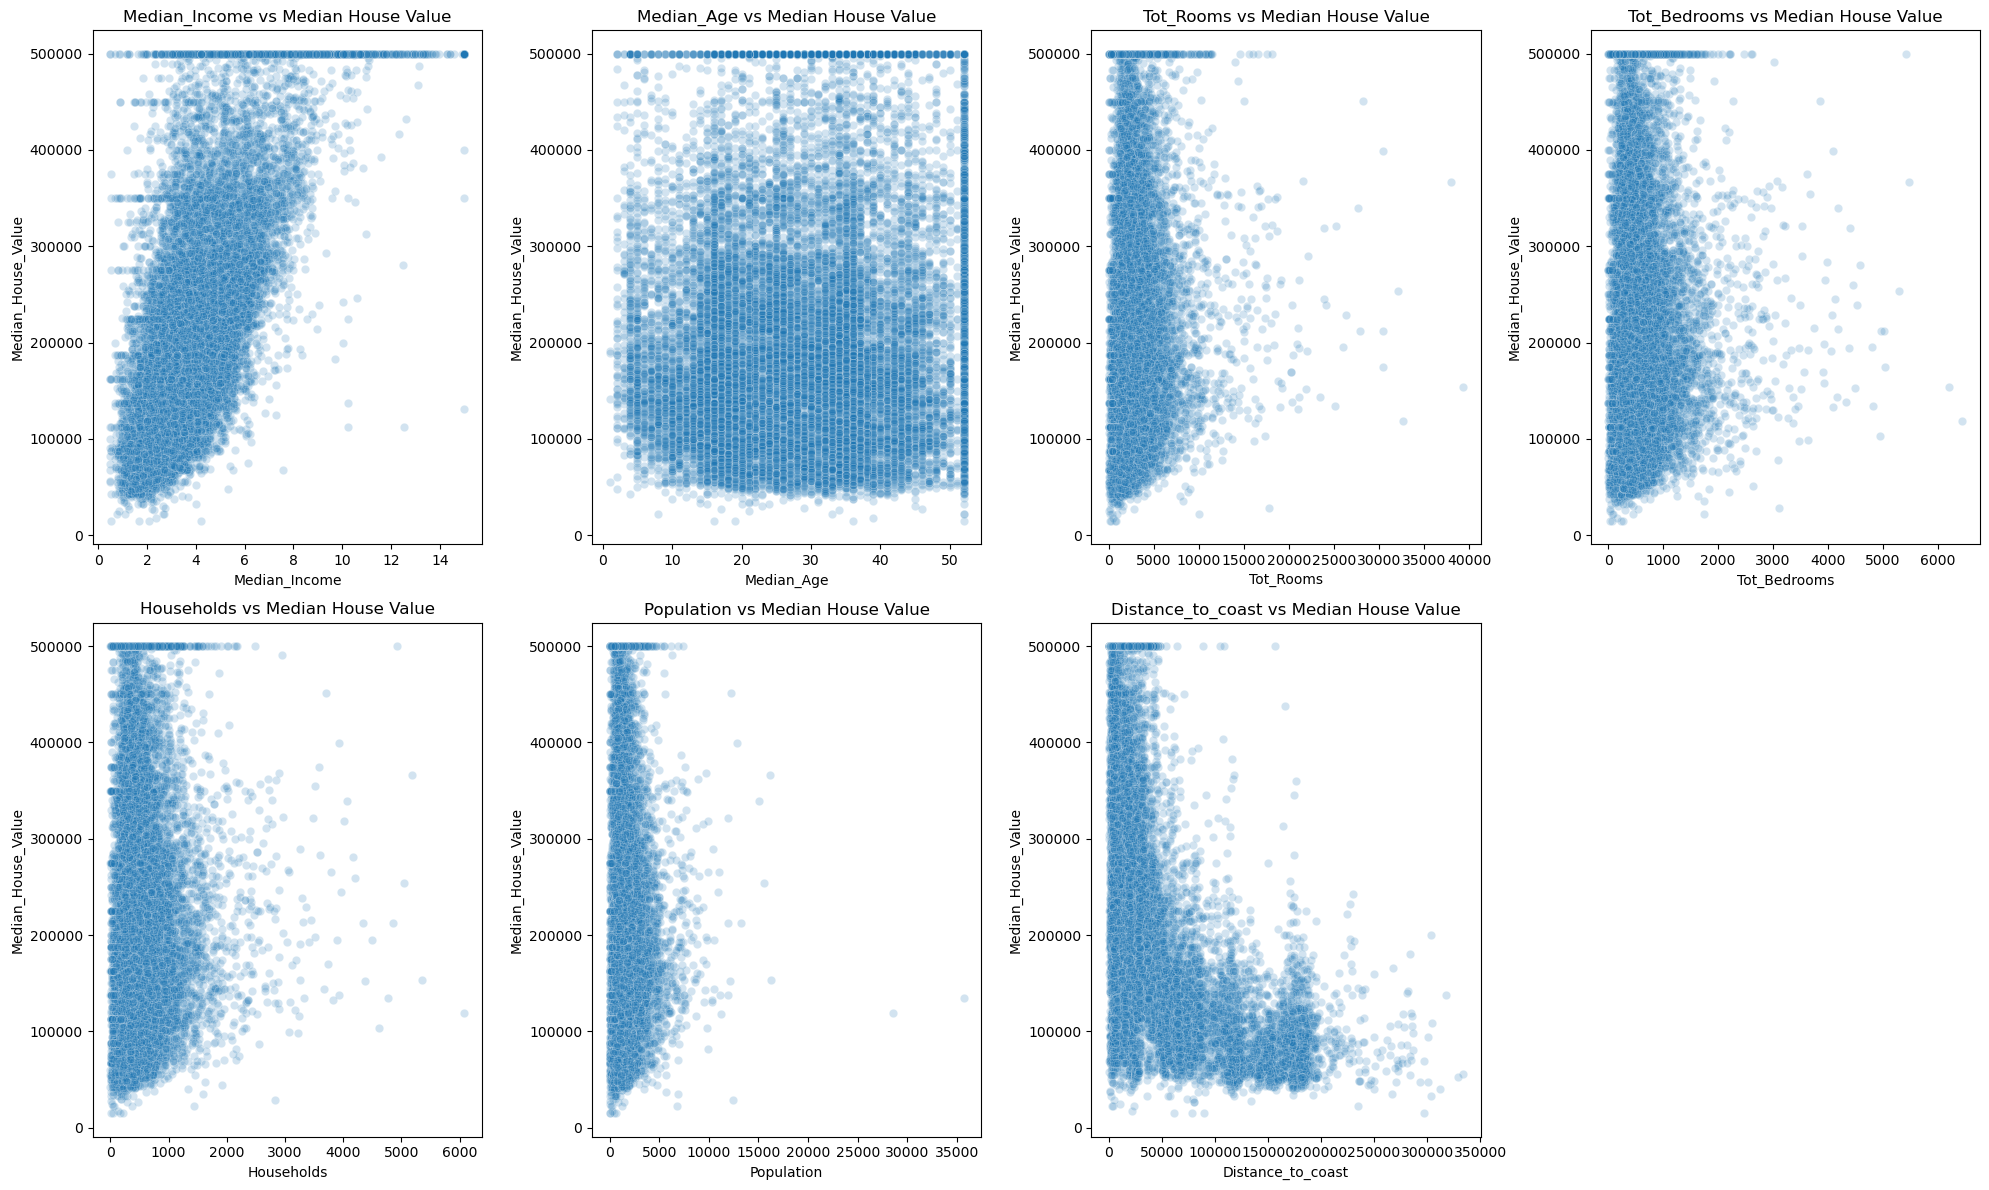

In [14]:
# Scatter plots showing the relationship between the Median House Value and other features
features = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Households', "Population", "Distance_to_coast"]

plt.figure(figsize=(20, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x=housing_df[feature], y=housing_df['Median_House_Value'], alpha = 0.2)
    plt.title(f'{feature} vs Median House Value')
plt.tight_layout()
plt.show()

Similar to correlation in understanding relationships, we use the scatterplots to further see how the relationship is like.
From the scatterplots, we observe that:
1. Higher median incomes are generally associated with higher median house values.
2. No strong correlation is evident between age and median house value
3. There is a possible correlation between the number of rooms and house value and number of bathrooms and house value, same with households.
4. There is no clear pattern between population and MHV suggesting that population doesn't strongly influence median house value.

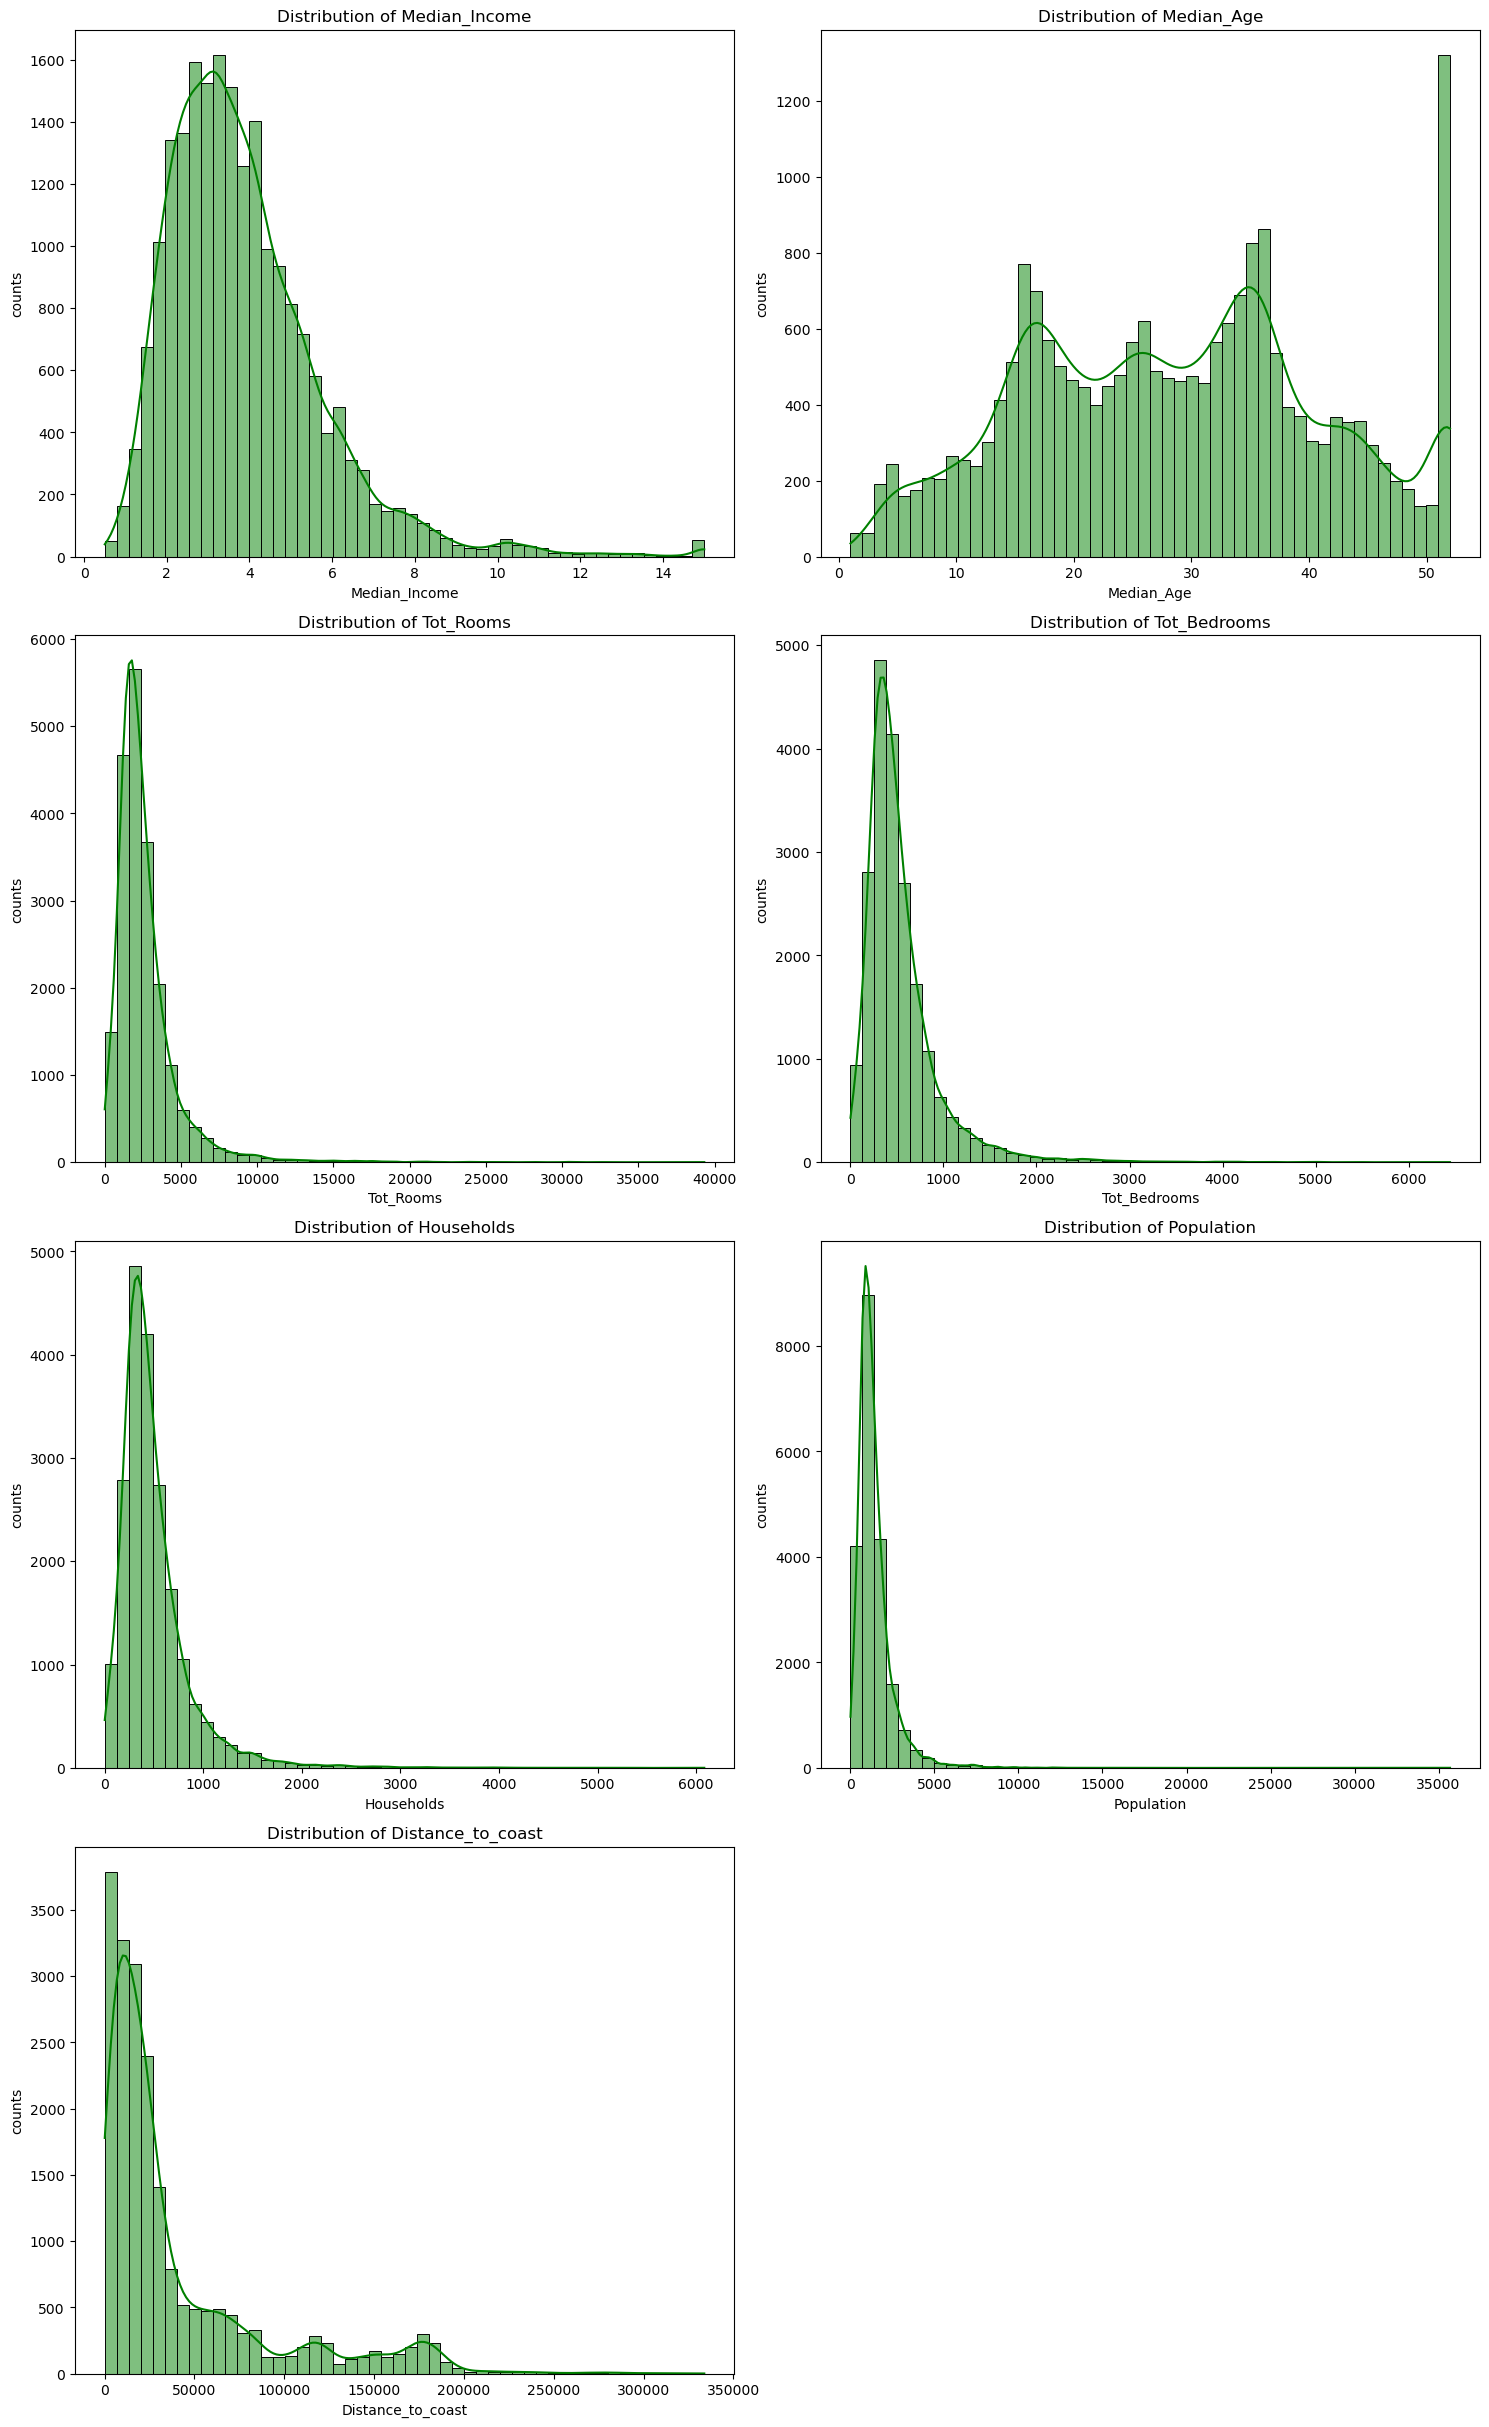

In [15]:
# Histograms showing the distribution of the features in our dataset
plt.figure(figsize =(15,30))
for i,feature in enumerate(features,start=1):
    plt.subplot(5,2,i);
    sns.histplot(data = housing_df, x= feature, bins=50, kde = True, color = "green",edgecolor = "black")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("counts")    

plt.tight_layout()
plt.show()

The histogram plots show how the median income is spread across the population. It's likely a bell curve, indicating that most people's median income falls within a specific range, with fewer people having significantly higher or lower incomes. The age distribution indicates a bimodal shape with a larger young population and a smaller older population. The rooms, bedrooms, households, population and distance to coast are all right skewed and this indicates that the lower values are more concentrated than the higher values. this could be due to

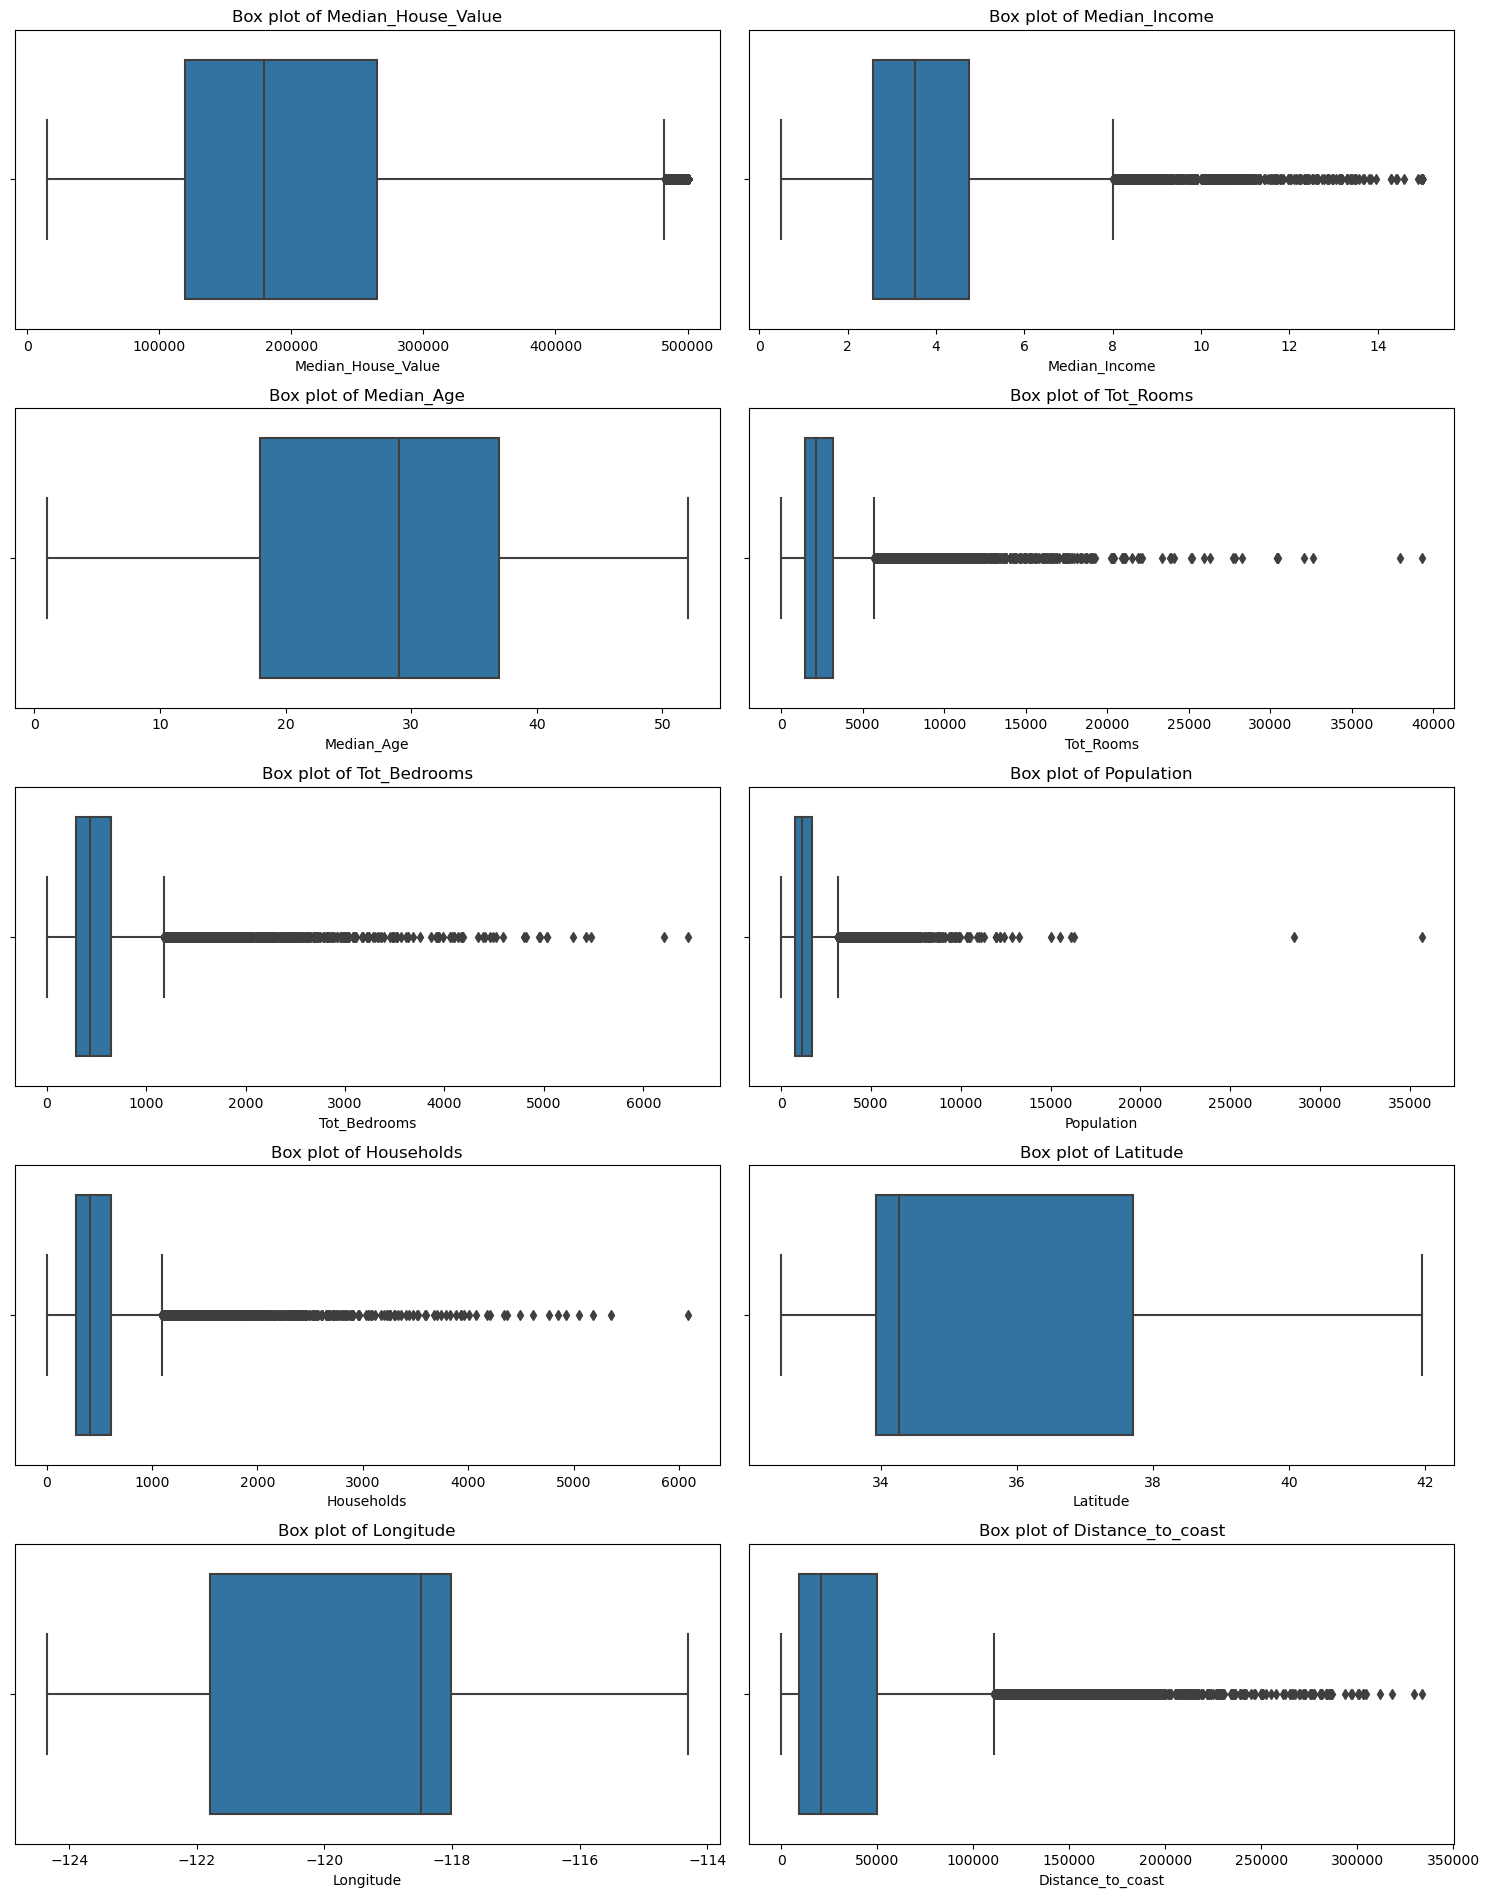

In [16]:
# Visualizing our numerical data using boxplot, 
'''this helps us to also see whether there are outliers in our dataset'''
plt.figure(figsize=(15,30))
for i,col in enumerate(housing_df.columns,start=1):
    plt.subplot(8,2,i)
    sns.boxplot(x = housing_df[col])
    plt.title(f'Box plot of {col}')
    
plt.tight_layout()
plt.show()

From the boxplot images returned, we see that there seems to be a cluster of data points extending beyond the upper whisker, indicating potential high-value outliers in Median House Value. Aside from Median age, Latitude and Longitude, all other features like Median income, Total rooms, Total bedrooms, Population and Households indicate potential outliers.

In [17]:
# Function to identify outliers using the IQR method
''' we use this to further understand how the outliers are distributed for each features'''
def identify_outliers_iqr(housing_df):
    outliers = {}
    Q1 = housing_df.quantile(0.25)
    Q3 = housing_df.quantile(0.75)
    IQR = Q3 - Q1
    for col in housing_df.columns:
        outliers[col] = housing_df[(housing_df[col] < (Q1[col] - 1.5 * IQR[col])) | (housing_df[col] > (Q3[col] + 1.5 * IQR[col]))]
    return outliers
print("The number of outliers in the dataset for each features are as follows: ")
outliers_iqr = identify_outliers_iqr(housing_df)
outliers_count_iqr = {col: len(outliers_iqr[col]) for col in housing_df.columns}
outliers_count_iqr

The number of outliers in the dataset for each features are as follows: 


{'Median_House_Value': 1071,
 'Median_Income': 681,
 'Median_Age': 0,
 'Tot_Rooms': 1287,
 'Tot_Bedrooms': 1282,
 'Population': 1196,
 'Households': 1220,
 'Latitude': 0,
 'Longitude': 0,
 'Distance_to_coast': 2376}

In [18]:
# Handling outliers by capping the values (Winsorization)
'''Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers
on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme 
values is called winsorized mean. For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data'''

Q1 = housing_df.quantile(0.25) #
Q3 = housing_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization (capping the extreme values to the lower bound and upper bound)
# housing_df1 is housing_df with outliers treated
housing_df1 = housing_df.copy()
for col in housing_df.columns:
    housing_df1[col] = housing_df[col].clip(lower_bound[col], upper_bound[col])



We decide to go with winsorization because we see that for most of the variables, the outliers in them is about 5% and more and they represent genuine data points. Deleting them completely could affect our model when it comes across similar values in the future, however, capping extreme values will prevent potential loss of information. Winsorization could also help us reduce skewness and improve the normality of the data.

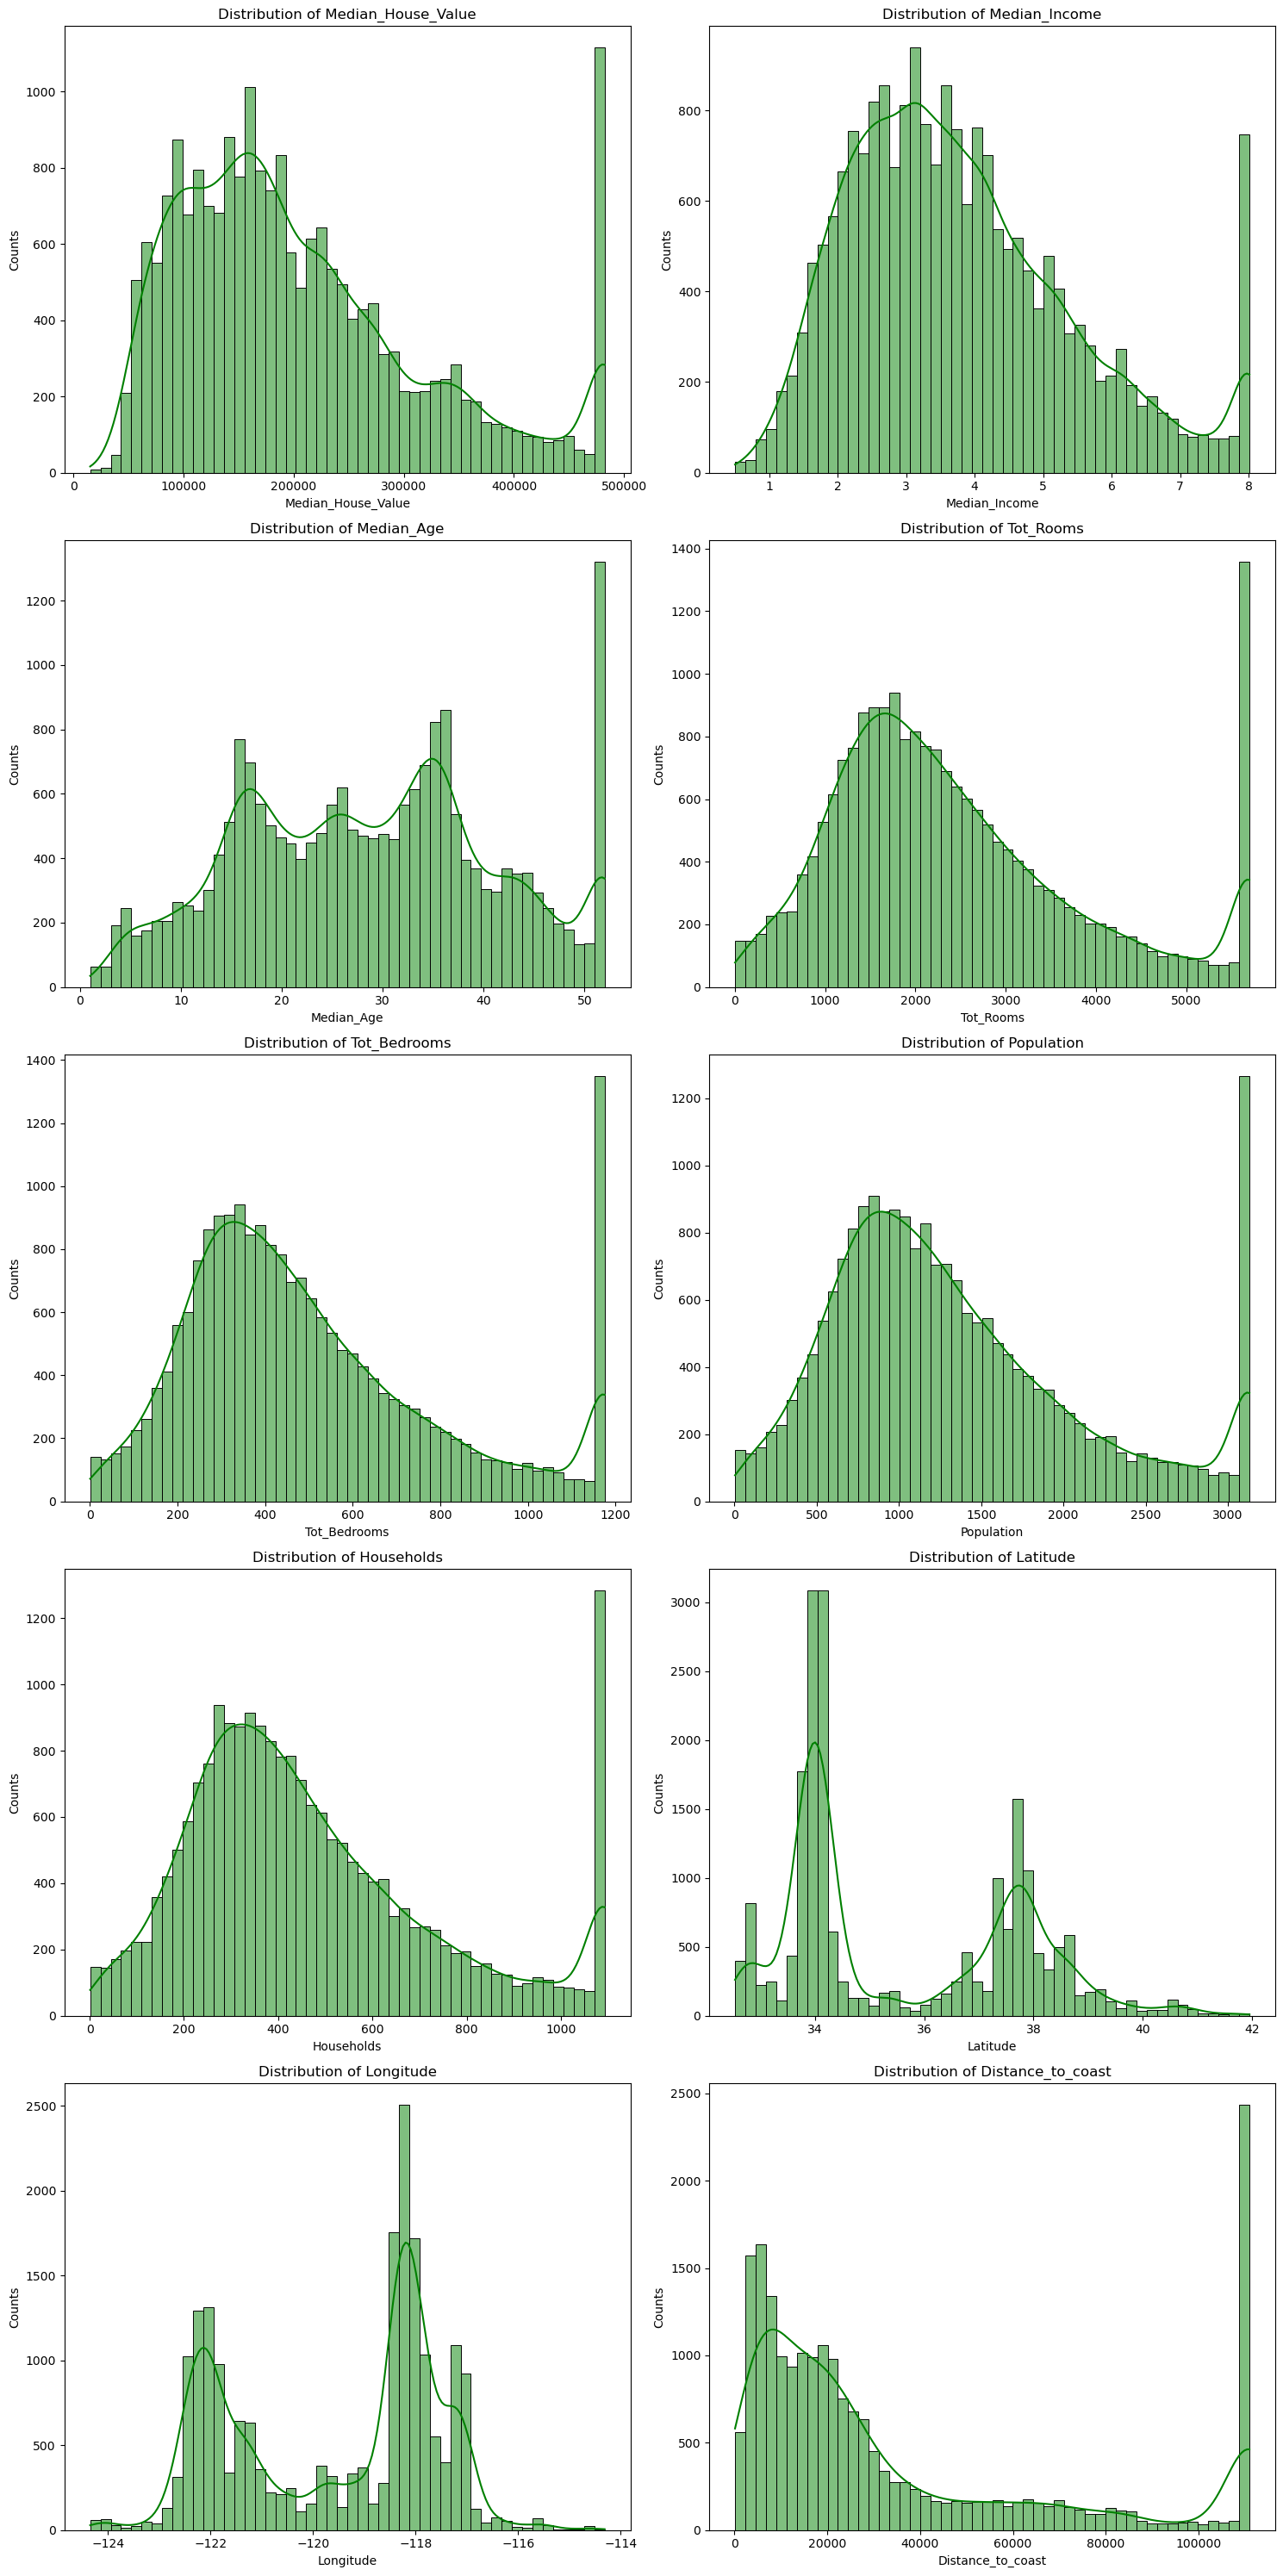

In [19]:
# Histograms showing the distribution of the features in our dataset after outliers have been treated
plt.figure(figsize=(15, 30))
for i, col in enumerate(housing_df1.columns, start=1):
    plt.subplot(5, 2, i)
    sns.histplot(data= housing_df1, x= col, bins=50, kde=True, color="green", edgecolor="black")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Counts")

    
plt.tight_layout()
plt.show()


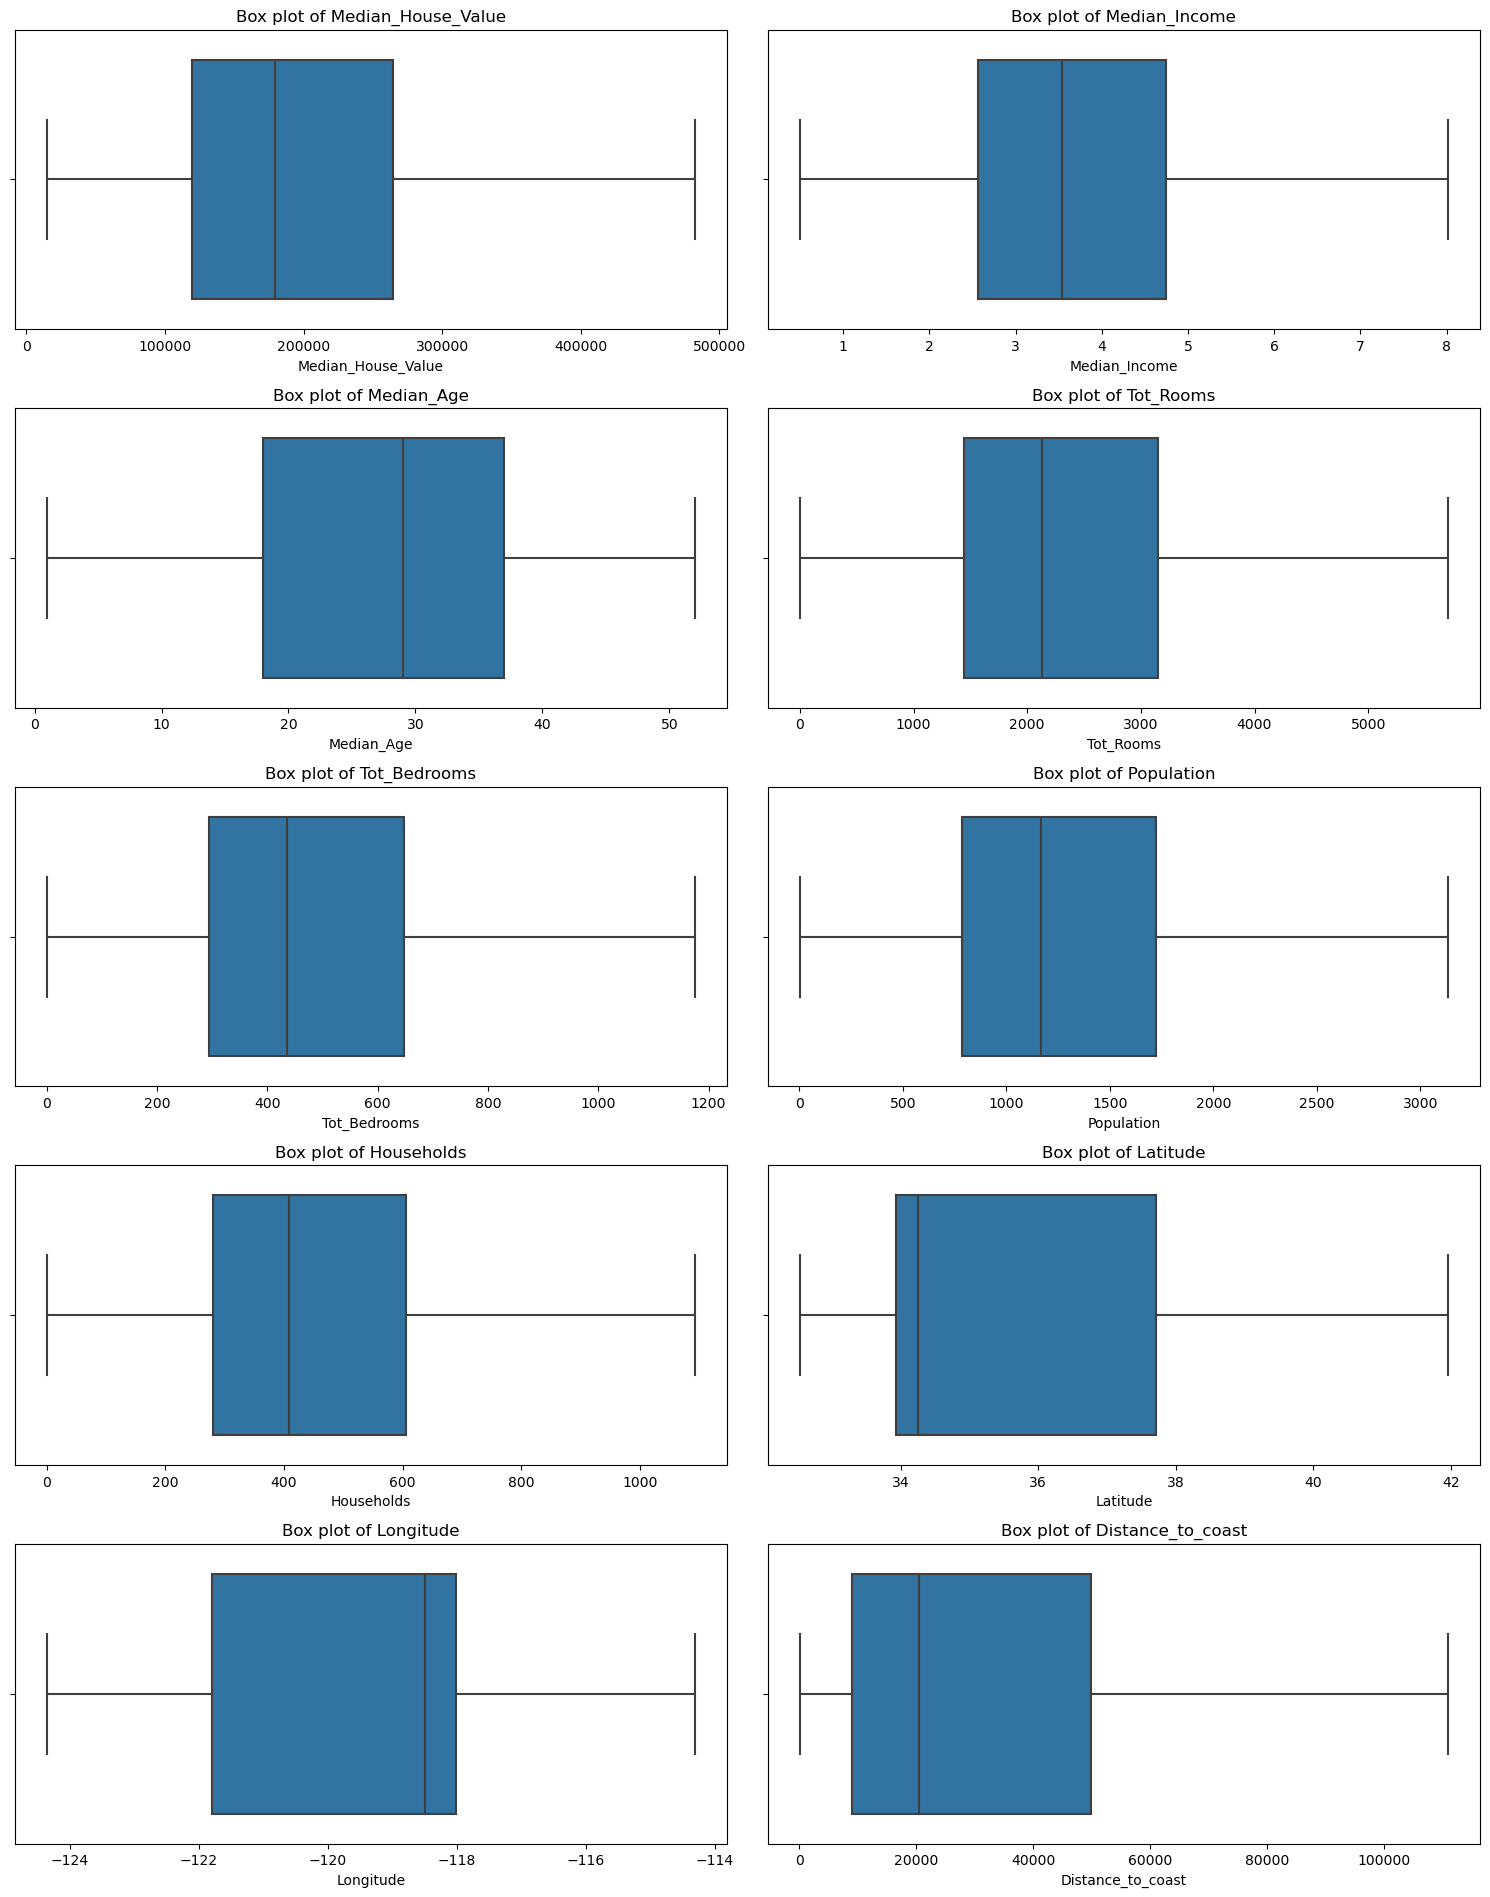

In [20]:
# Visualizing our numerical data using boxplot, after the treatment of outliers
plt.figure(figsize=(15,30))
for i,col in enumerate(housing_df1.columns,start=1):
    plt.subplot(8,2,i)
    sns.boxplot(x = housing_df1[col])
    plt.title(f'Box plot of {col}')
    

plt.tight_layout()
plt.show()

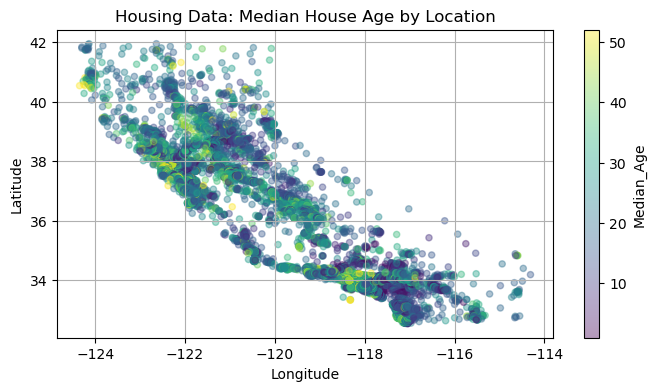

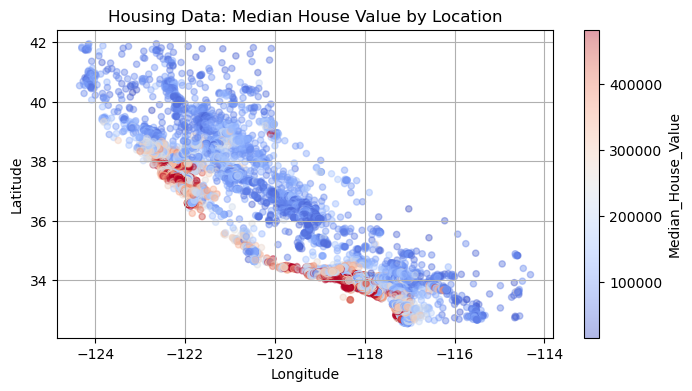

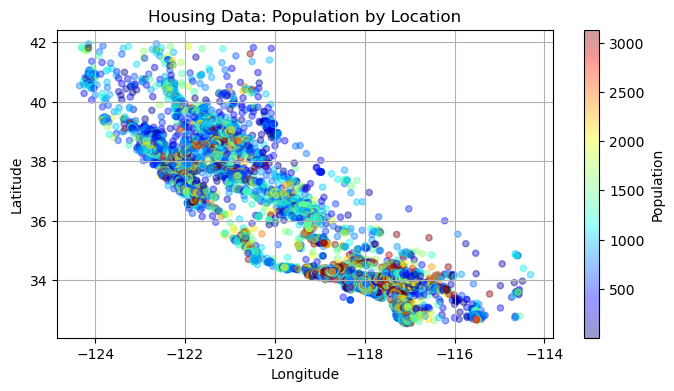

In [21]:
''' since we have information relating to geographical location, understanding how our features are related to location is impor-
tant as it can help reveal areas with high concentrations of data points, indicating potential hotspots or clusters. '''

# Scatter plot for Age distribution with respect to location
housing_df1.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, c= "Median_Age",
             cmap="viridis", colorbar=True, alpha = 0.4,
             legend=True, sharex=False, figsize=(8, 4))

plt.title("Housing Data: Median House Age by Location")
plt.show()

# Scatter plot for Price distribution with respect to Location
housing_df1.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, c= "Median_House_Value",
             cmap="coolwarm", colorbar=True, alpha = 0.4,
             legend=True, sharex=False, figsize=(8, 4))

plt.title("Housing Data: Median House Value by Location")
plt.show()

# Scatter plot for Population distribution with respect to Location
housing_df1.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, c= "Population",
             cmap="jet", colorbar=True, alpha = 0.4,
             legend=True, sharex=False, figsize=(8, 4))

plt.title("Housing Data: Population by Location")
plt.show()


From the scatterplots, the median house age by location shows the potential geographic patterns in house age, with older homes concentrated in certain areas. It appears there might be a correlation between coastal proximity and house age, with older homes more prevalent in coastal regions.This could be because older homes might be concentrated in areas with earlier development and urbanization.

The median house values by location depicts a significant range in median house values across the plotted area. It also shows that expensive houses seems to be closer to the coast which supports our assumption made earlier that houses close to the coast are more expensive. Also, differences in median house values might reflect urban vs. rural disparities, with higher values concentrated in urban areas.

The population density by location shows that population is concentrated in specific areas, indicating urban centers. The highest population densities are clustered along the coast, particularly in the southern part of the region. Inland regions, especially in the north and east, have significantly lower population densities. Furthermore, there seems to exist an Urban-Rural divide, the plot highlights the stark contrast between densely populated urban areas and sparsely populated rural areas.

### Phase 3: Feature Engineering

In [22]:
# Create a copy of our dataset for feature engineering
# housing_df2 is housing_df1 with engineered features
housing_df2 = housing_df1.copy()

In [23]:
# Creating a new feature 'Rooms_per_Household' from Total rooms
housing_df2['Rooms_per_Household'] = housing_df2['Tot_Rooms'] / housing_df2['Households']


In [24]:
# Creating a new feature 'Income_cat' from median income
housing_df2['Income_cat'] = pd.cut(housing_df2['Median_Income'], bins=[0.,1.5,3.0, 4.5, 6., np.inf],
                                    labels=[1,2,3,4,5])

In [25]:
housing_df2.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Rooms_per_Household,Income_cat
0,452600.0,8.013025,41,880.000,129,322,126.0,37.88,-122.23,9263.040773,6.984127,5
1,358500.0,8.013025,21,5698.375,1106,2401,1092.5,37.86,-122.22,10225.733072,5.215904,5
2,352100.0,7.257400,52,1467.000,190,496,177.0,37.85,-122.24,8259.085109,8.288136,5
3,341300.0,5.643100,52,1274.000,235,558,219.0,37.85,-122.25,7768.086571,5.817352,4
4,342200.0,3.846200,52,1627.000,280,565,259.0,37.85,-122.25,7768.086571,6.281853,3


Text(0.5, 1.0, 'Distribution of House Value Categories')

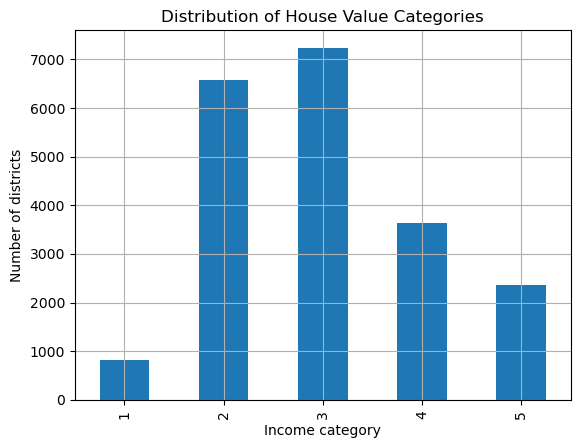

In [26]:
# Barplot of Income category and House value category
plt.figsize=(12, 5)
housing_df2["Income_cat"].value_counts().sort_index().plot.bar(grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.title("Distribution of House Value Categories")

The barchart displays the distribution of income categories across a number of districts. The x-axis represents the income categories, binned in increments of $15,000, while the y-axis represents the number of districts falling within each category.
The highest number of districts falls within the lower house value categories (0-15,000 and 15,000-30,000). As the house value category increases, the number of districts decreases rapidly.
The data suggests a clear segmentation of the housing market, with a large number of affordable housing options and a smaller proportion of luxury properties.

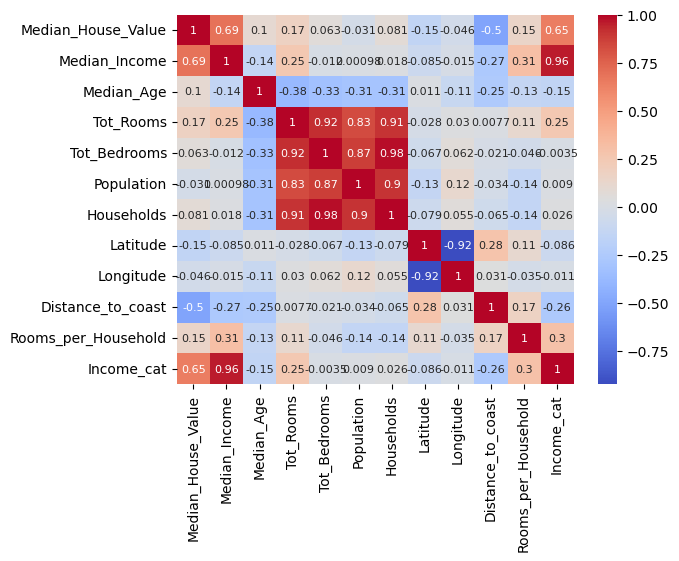

In [27]:
# Correlation matrix of the housing data 
sns.heatmap(housing_df2.corr(), annot=True, annot_kws={"fontsize": 8}, cmap='coolwarm')
plt.show()

Again, we conduct a correlation analysis to visualize the relationship between our variables after feature engineering has been done.
from the correlation matrix, we find out that the correlation indices were relatively maintained, as most of the values obtained are the same with the values obtained before feature engineering. As expected, median income have a very strong positive correlation of 0.96 with income category, this could be due to the derivation of income category from median income. however, rooms per household does not show much correlation with total rooms.
Also, there is a strong negative correlation of -0.5 between Distance to Coast and Median House Value suggesting that house prices tend to be lower farther from the coast. This supports our assumption that houses close to the coast are more expensive.

In [28]:
# Feature Selection:
'''from the correlation analysis, we found out that total rooms and total bedrooms have a very high correlation between them, 
also population and households have very high correlation so we decide to drop one of each (Tot_Bedrooms, households) 
to avoid multicollinearity issues. And we decide to go with all remaining features'''

housing_df2.drop(columns= ["Tot_Bedrooms", "Households"], axis = 1, inplace= True)
housing_df1.drop(columns= ["Tot_Bedrooms", "Households"], axis = 1, inplace= True)

In [29]:
# Subsetting our target variable for the housing_df1 and housing_df2 to be y1 and y2, and their features to be X1 and X2 
# respectively.
""" Remember housing_df1 is housing_df with outliers treated and housing_df2 is housing_df1 with engineered features. We decided
to use two datasets because we want to see how our model will perform with the newly engineered features and without the 
engineered features"""
y1 = housing_df1.iloc[:, 0]    # The first column (Median House Value) as the target variable
X1 = housing_df1.iloc[:, 1:]   # All other features


y2 = housing_df2.iloc[:, 0]    # The first column (Median House Value) as the target variable
X2 = housing_df2.iloc[:, 1:]   # All other features

In [30]:
# Encode categorical variables using one-hot or label encoding techniques.
""" We didn't need to do any label encoding because our variables are all numeric and income_cat which is a categorical engineered
feature is ordinal in nature and does not require encoding"""

" We didn't need to do any label encoding because our variables are all numeric and income_cat which is a categorical engineered\nfeature is ordinal in nature and does not require encoding"

In [31]:
# Standardization of housing_df1 features
""" We standardize our dataset because our features have different scales which could give more importance to features with 
larger values simply because of their magnitude and thus lead to a bias in our model"""

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X1[:] = scaler.fit_transform(X1)

X1.head()

,Median_Income,Median_Age,Tot_Rooms,Population,Latitude,Longitude,Distance_to_coast
0,2.541006,0.982143,-1.117285,-1.325821,1.052548,-1.327835,-0.735065
1,2.541006,-0.607019,2.329936,1.389936,1.043185,-1.322844,-0.707676
2,2.085156,1.856182,-0.697327,-1.098528,1.038503,-1.332827,-0.763629
3,1.111288,1.856182,-0.835405,-1.017539,1.038503,-1.337818,-0.777598
4,0.027262,1.856182,-0.582857,-1.008395,1.038503,-1.337818,-0.777598


In [32]:
# Standardization of housing_df2 features

X2[:] = scaler.fit_transform(X2)

X2.head()

,Median_Income,Median_Age,Tot_Rooms,Population,Latitude,Longitude,Distance_to_coast,Rooms_per_Household,Income_cat
0,2.541006,0.982143,-1.117285,-1.325821,1.052548,-1.327835,-0.735065,0.660783,1.890128
1,2.541006,-0.607019,2.329936,1.389936,1.043185,-1.322844,-0.707676,-0.074654,1.890128
2,2.085156,1.856182,-0.697327,-1.098528,1.038503,-1.332827,-0.763629,1.203144,1.890128
3,1.111288,1.856182,-0.835405,-1.017539,1.038503,-1.337818,-0.777598,0.175499,0.941894
4,0.027262,1.856182,-0.582857,-1.008395,1.038503,-1.337818,-0.777598,0.368694,-0.006340


### Phase 4: Model Training and Evaluation

In [33]:
# Importing libraries for model training and evaluation
from sklearn.model_selection import train_test_split # for splitting data into train and test set
from sklearn.linear_model import LinearRegression # for fitting a linear regression model
from sklearn.tree import DecisionTreeRegressor # for fitting a decision tree model
from sklearn.ensemble import RandomForestRegressor # for fitting a random forest model 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for evaluation of fitted models
from sklearn.linear_model import Lasso


For our model training and evaluation, we will be working with two datasets. The first dataset is our cleaned housing dataset that does not contain our new engineered features while the second dataset contains the engineered features. The first dataset has 8 features while the second dataset has 11 features.

The **Intuition** behind this is because we want to see the performance of our models with and without the feature enginnering. This will help us know whether engineering new features made our model perform better or not.

Dataset 1 makes is our X1, y1 and dataset 2 is our X2, y2.

In [34]:
# Split the datasets: 80% for training sets and 20% for testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [35]:
# Checking for the size of our dataset after splitting
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((16512, 7), (4128, 7), (16512,), (4128,))

In [36]:
# Defining our models: we are using the Linear regression model, Decision tree regression and Random forest regression models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
}

In [37]:
# Functions to train and evaluate our models for dataset 1 and dataset 2
def train_and_evaluate_models(X_train, y_train, X_test, y_test, models):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}
        
    return results

In [38]:
# Print results for dataset 1
results1 = train_and_evaluate_models(X1_train, y1_train, X1_test, y1_test, models)
print("Results for Dataset 1:")
for model_name, metrics in results1.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']:.3f}, MAE: {metrics['MAE']:.3f}, R²: {metrics['R²']:.3f}")


Results for Dataset 1:
Linear Regression - RMSE: 70001.058, MAE: 52448.869, R²: 0.612
Decision Tree - RMSE: 64018.368, MAE: 40600.203, R²: 0.676
Random Forest - RMSE: 46732.146, MAE: 30242.561, R²: 0.827


In [39]:
# Print results for dataset 2
results2 = train_and_evaluate_models(X2_train, y2_train, X2_test, y2_test, models)
print("\nResults for Dataset 2:")
for model_name, metrics in results2.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']:.3f}, MAE: {metrics['MAE']:.3f}, R²: {metrics['R²']:.3f}")



Results for Dataset 2:
Linear Regression - RMSE: 69819.825, MAE: 52095.240, R²: 0.614
Decision Tree - RMSE: 64899.090, MAE: 40990.928, R²: 0.667
Random Forest - RMSE: 46364.471, MAE: 30094.325, R²: 0.830


In [40]:
# Getting the parameters used to run the initial decision tree and random forest models
print(DecisionTreeRegressor(random_state = 42).get_params())
print(RandomForestRegressor(random_state = 42).get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Since there seems not to be any significant difference in the evaluation metrics for both housing_df1 and Housing_df2, we will stick with housing_df2 for our hyperparameter tuning.

In [41]:
# Hyperparameter tuning of our random forest model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for hyperparameter tuning of our random forest model
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [1000, 1500, 2000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the hyperparameters distribution for our decision tree model
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

models1 = {
    'Lasso Model': Lasso(alpha= 50, max_iter =100, tol= 0.1),
    'Decision Tree': RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                                        param_distributions=param_dist,
                                        n_iter=20, cv=5, random_state=42),
    'Random Forest': RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                        param_distributions=param_grid,
                                        n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
}

# Functions to train and evaluate our models for dataset 2
def train_and_evaluate_models1(X_train, y_train, X_test, y_test, models1):
    results = {}
    for name, model in models1.items():
        if name == 'Lasso Model':
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            best_parameters = None
        else:
            model.fit(X_train, y_train)  # Fit the model with RandomizedSearchCV
            best_model = model.best_estimator_ # Get the best model and its predictions
            y_pred = best_model.predict(X_test)
            best_parameters = model.best_params_
        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {'Best Parameters': best_parameters,'RMSE': rmse, 'MAE': mae, 'R²': r2}
        
    return results


In [42]:
# Train and evaluate the models using the function for Dataset 2
results3 = train_and_evaluate_models1(X2_train, y2_train, X2_test, y2_test, models1)

# Display the results
print("\nResults for Dataset 2 after hyperparameter tuning:")
for model_name, metrics in results3.items():
    print(f"{model_name} - Best Parameters: {metrics['Best Parameters']}")
    print(f"{model_name} - RMSE: {metrics['RMSE']:.3f}, MAE: {metrics['MAE']:.3f}, R²: {metrics['R²']:.3f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Results for Dataset 2 after hyperparameter tuning:
Lasso Model - Best Parameters: None
Lasso Model - RMSE: 69843.499, MAE: 52103.303, R²: 0.614
Decision Tree - Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 13}
Decision Tree - RMSE: 56208.563, MAE: 36968.536, R²: 0.750
Random Forest - Best Parameters: {'n_estimators': 1500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Random Forest - RMSE: 46117.633, MAE: 30145.456, R²: 0.832


In [43]:
# Extract the best Random Forest model from the hyperparameter tuning
best_model_rf = models1['Random Forest'].best_estimator_

### Phase 5: Model Interpretation and Reporting

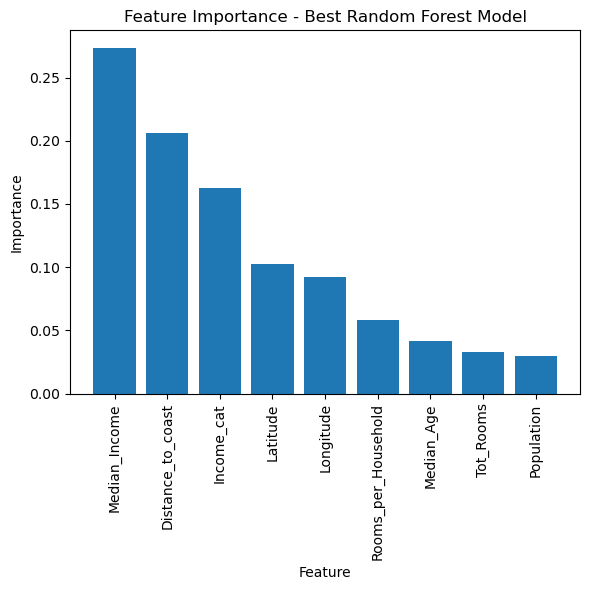

In [44]:
# Define the function to plot feature importance
def plot_feature_importance(best_model, feature_names):
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(6, 6))
        plt.title("Feature Importance - Best Random Forest Model")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{type(best_model).__name__} does not have feature importances.")

# Plotting feature importance 
plot_feature_importance(best_model_rf, feature_names=X2.columns)


In [45]:
# Visualize results for Dataset 2

# Actual vs. Predicted Prices
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b')  # Diagonal line
    plt.title("Actual vs. Predicted Prices")
    plt.xlabel("Actual Prices")
    plt.ylabel("Random Forest Prediction")
    plt.tight_layout()
    plt.show()

# Residual Plot
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='b')
    plt.title("Residual Plot")
    plt.xlabel("Random Forest Prediction")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()

# Distribution of Prediction Errors
def plot_prediction_error_distribution(y_test, y_pred):
    errors = y_test - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(errors, kde=True, color="blue")
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



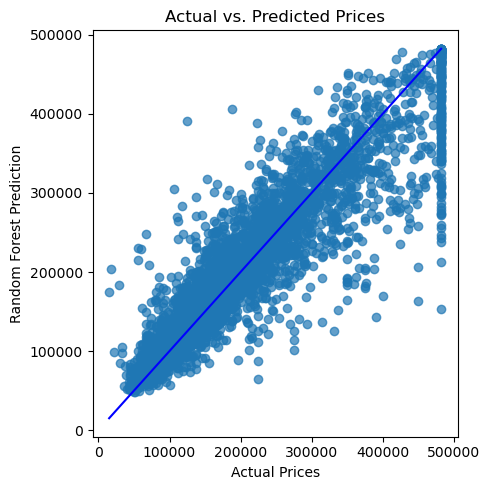

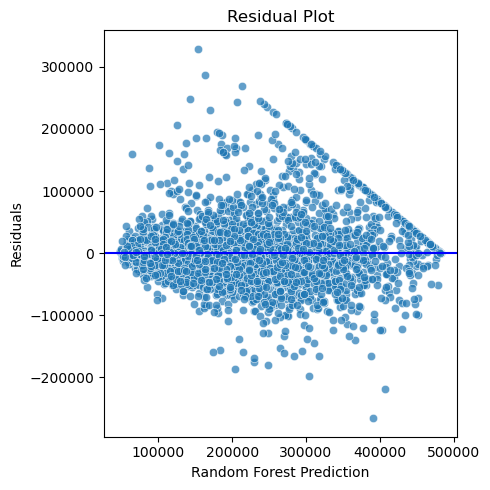

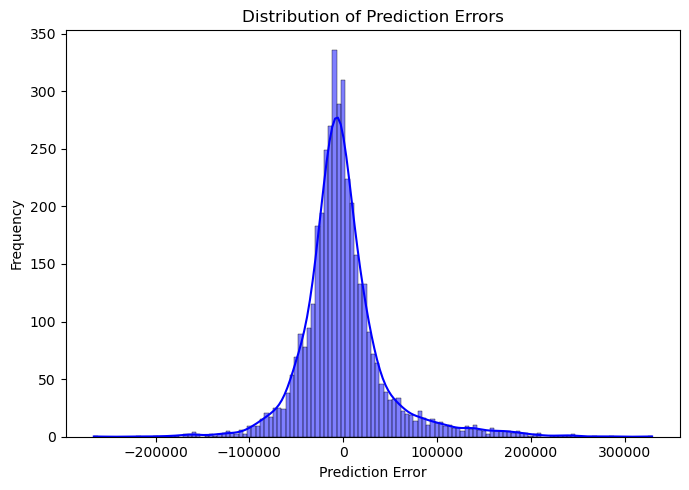

In [46]:
# Generate visualizations
y_pred = best_model_rf.predict(X2_test)

plot_actual_vs_predicted(y2_test, y_pred)
plot_residuals(y2_test, y_pred)
plot_prediction_error_distribution(y2_test, y_pred)
